<a href="https://colab.research.google.com/github/ArtMla/MNIST-Image-classification/blob/main/MNIST_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Loading and Exploration
In this phase, we load the MNIST dataset and visualize sample images to understand the structure and shape of the data. MNIST consists of 28x28 grayscale images of handwritten digits ranging from 0 to 9.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


## 1.1 Visualizing Sample Digits
Below are the first 9 samples from the training dataset, showing the handwritten digits and their corresponding labels.

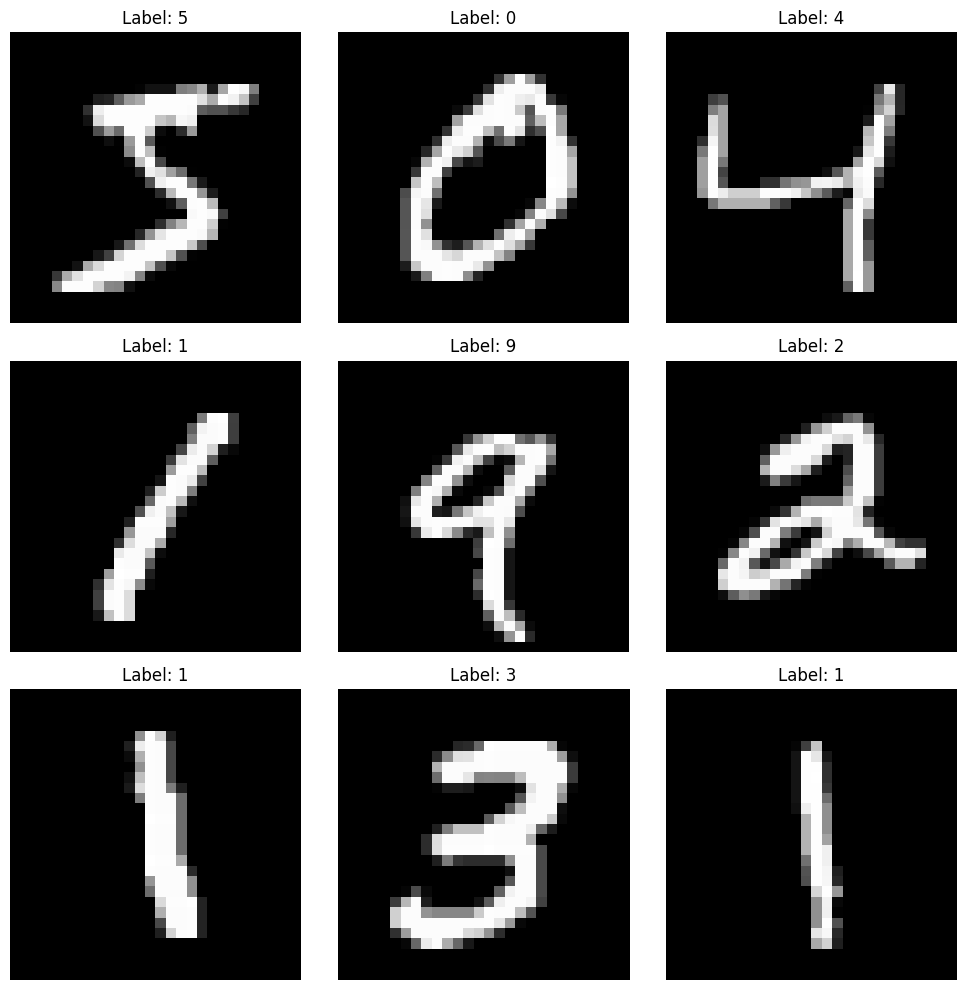

In [ ]:
# Show the first 9 digits
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Step 2: Pre-processing

To prepare the MNIST data for training, we perform the following preprocessing steps:



*   Normalization: Scales pixel values from [0, 255] to [0, 1] for faster
convergence.
*   Flattening: Converts each 28x28 image into a 784-dimensional vector for input into dense layers.
*   One-hot Encoding: Transforms digit labels (0–9) into binary vectors suitable for multi-class classification.


In [ ]:
# Normalise the pixels to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the 28x28 images into 784-dimension vectors
x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Confirm the shape
print("Flattened training data shape:", x_train_flat.shape)
print("Flattened test data shape:", x_test_flat.shape)



Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [ ]:
# Step 3: Build Model A with ReLU activation
model_relu = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model_relu.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_relu.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)